In [105]:
from astropy.io import fits
from matplotlib import pyplot as plt
from auto_stretch import apply_stretch
import cv2
import numpy as np

In [106]:
img_path = 'dataset/hst_skycell-p0035x15y13_acs_wfc_f850lp_all_drc.fits'
raw_img = fits.getdata(img_path)

In [107]:
raw_img

array([[0.02859605, 0.027586  , 0.02769073, ..., 0.01780632, 0.02239768,
        0.02474354],
       [0.02690456, 0.02445572, 0.02683677, ..., 0.02546305, 0.0241654 ,
        0.02178033],
       [0.02999289, 0.02832116, 0.02953867, ..., 0.03300973, 0.02765054,
        0.02678087],
       ...,
       [0.02752619, 0.03304441, 0.03038583, ..., 0.        , 0.        ,
        0.        ],
       [0.02852352, 0.02988063, 0.028737  , ..., 0.        , 0.        ,
        0.        ],
       [0.02773392, 0.03068275, 0.03032289, ..., 0.        , 0.        ,
        0.        ]], shape=(10220, 5040), dtype='>f4')

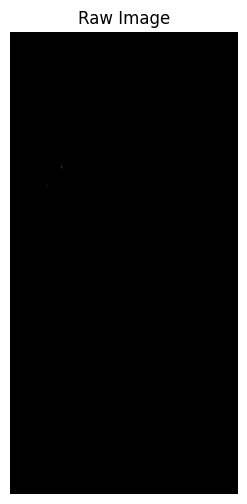

In [108]:
# Simple image plot
plt.figure(figsize=(12, 6))
plt.imshow(raw_img, cmap='gray')
plt.title('Raw Image')
plt.axis('off')
plt.show()

In [109]:
stretched_img = apply_stretch(raw_img)
print(stretched_img)

[[0.36272046 0.34150645 0.34377143 ... 0.02835858 0.20569058 0.27344432]
 [0.32637808 0.26576    0.3248349  ... 0.2919688  0.25784266 0.1857076 ]
 [0.3899028  0.35708362 0.38132185 ... 0.44136673 0.342904   0.32355717]
 ...
 [0.34020594 0.44190797 0.39713654 ... 0.         0.         0.        ]
 [0.3612428  0.38780433 0.36557278 ... 0.         0.         0.        ]
 [0.344701   0.40248987 0.3959894  ... 0.         0.         0.        ]]


(np.float64(-0.5), np.float64(5039.5), np.float64(10219.5), np.float64(-0.5))

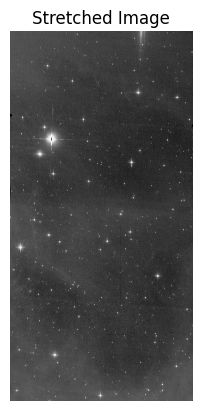

In [110]:
# Plot stretched image
plt.imshow(stretched_img, cmap='gray')
plt.title('Stretched Image')
plt.axis('off')

In [111]:
from math import ceil

# Define Gaussian Kernel
# FWHM: full width at half maximum, a measure to estimate the size of stars
# compute the kernel for small/medium size stars, as bigger ones are fewer and can be treated separately
FHWM = 7 # pixels
sigma = ceil(FHWM / 2.355) # std deviation
print(sigma)

kernel_size = (6*sigma) + 1 # rule for kernel size
print(kernel_size)

3
19


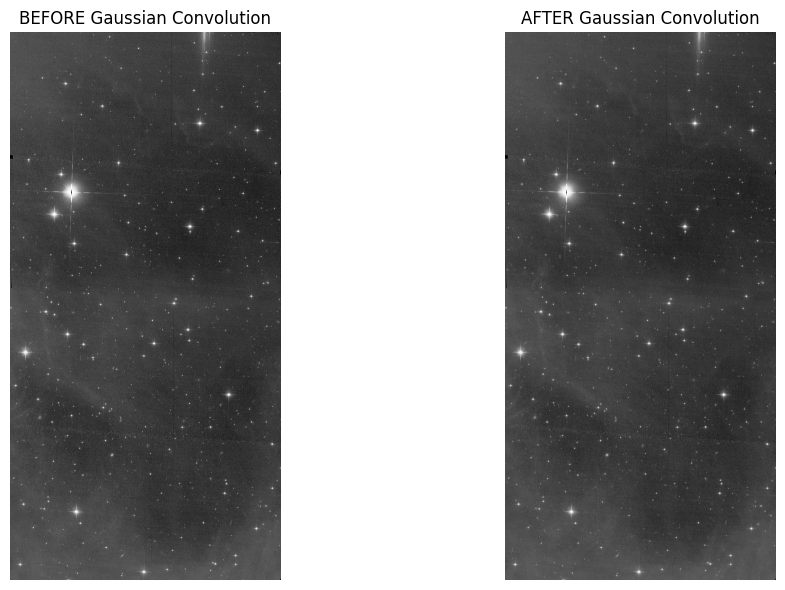

In [112]:
gauss_img = cv2.GaussianBlur(stretched_img, (kernel_size, kernel_size), sigma)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot image BEFORE convolution against Gaussian kernel
axes[0].imshow(stretched_img, cmap='gray')
axes[0].set_title('BEFORE Gaussian Convolution')
axes[0].axis('off')

# Plot image AFTER convolution against Gaussian kernel
axes[1].imshow(gauss_img, cmap='gray')
axes[1].set_title('AFTER Gaussian Convolution')
axes[1].axis('off')

plt.tight_layout()
plt.show()

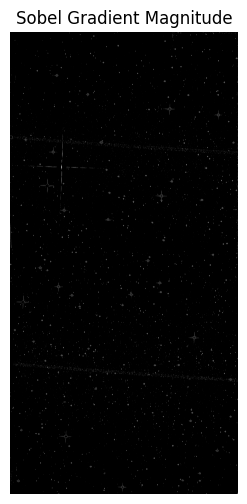

In [118]:
# Sobel gradient
sobel_x = cv2.Sobel(gauss_img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gauss_img, cv2.CV_64F, 0, 1, ksize=3)
grad_mag = cv2.magnitude(sobel_x, sobel_y)
grad_mag = cv2.convertScaleAbs(grad_mag, alpha=5.0)

# Display the gradient magnitude
plt.figure(figsize=(12,6))
plt.imshow(grad_mag, cmap='gray')
plt.title('Sobel Gradient Magnitude')
plt.axis('off')
plt.show()
